# Anasis de Datos Tarea 5 Trabajo Final
## Julian Rojas
## Predicción de sobrevivientes Titanic 

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/ 

In [1]:
# Importación de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2

## 1. Realizar un análisis exploratorio de los datos 

In [2]:
# Paso 1: Análisis exploratorio de los datos
df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

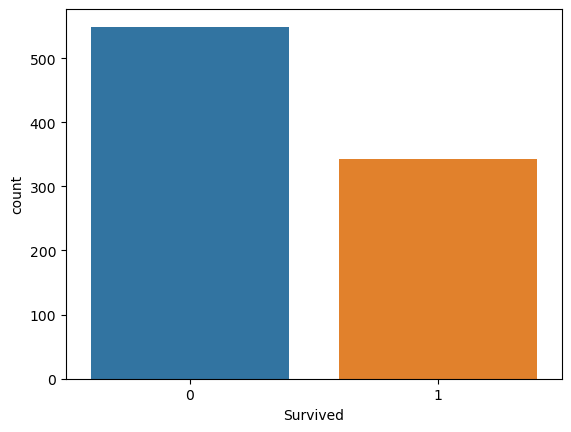

In [3]:
# Visualización relaciones entre variables
sns.countplot(x='Survived', data=df)
plt.show()

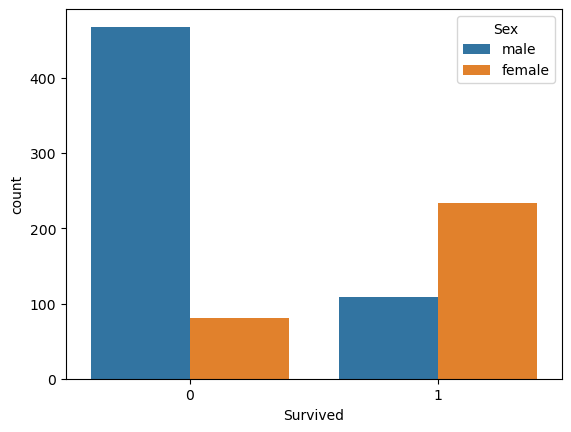

In [4]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()


In [5]:
# Seleccionamos columnas numéricas
df_numeric = df.select_dtypes(include=[float, int])

In [6]:
# Calculamos la matriz de correlación
corr_matrix = df_numeric.corr()

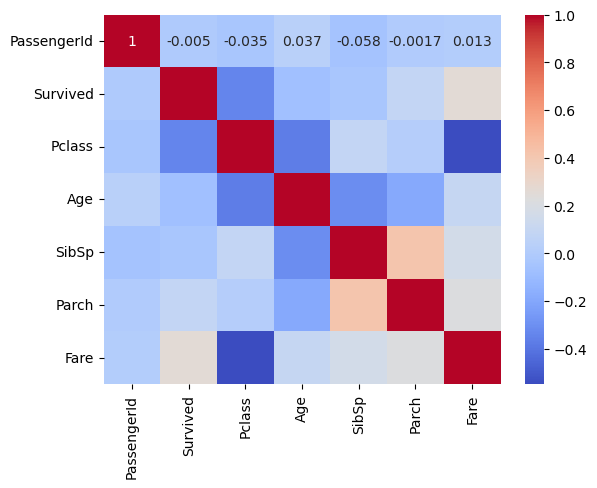

In [7]:
# Genera el heatmap con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## 2. Preprocesar los datos 

In [8]:
# Paso 2: Preprocesamiento de los datos
# Manejo de valores faltantes
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [9]:
# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [10]:
# Eliminar columnas no relevantes
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [11]:
print(df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


## 3.Seleccionar las características  para entrenar el modelo 

In [12]:
# Paso 3: Selección de características 
X = df.drop('Survived', axis=1)
y = df['Survived']

In [13]:
# Normalización de los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
if np.any(X < 0):
    print("Hay valores negativos en X que deben ser tratados.")
else:
    # Procede con la selección de características
    selector = SelectKBest(score_func=chi2, k=5)
    X_new = selector.fit_transform(X, y)
    print("Selected features:", selector.get_support(indices=True))

Hay valores negativos en X que deben ser tratados.


In [15]:
# Transformación a valores absolutos
X_transformed = np.abs(X)

selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_transformed, y)
print("Selected features:", selector.get_support(indices=True))

Selected features: [1 3 5 6 8]


## 4. Dividir el dataset en Train y Test 

In [16]:
# Paso 4: Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

## 5. Entrenamiento del Modelo

In [18]:
# Paso 5: Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## 6. Evaluar el desempeño  con métricas como precisión, recall, F1-score.

In [19]:
# Paso 6: Evaluar el desempeño del modelo
y_pred = model.predict(X_test)

In [20]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[90 15]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.7932960893854749


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

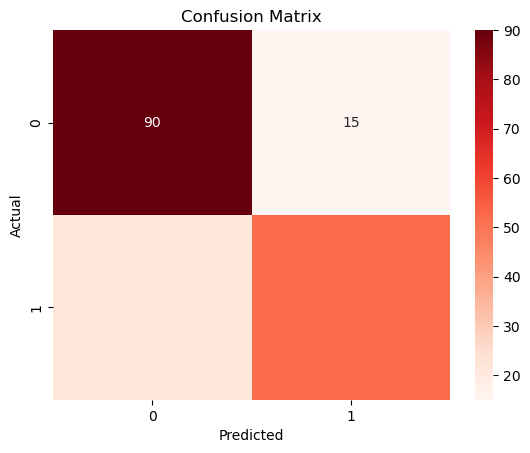

In [24]:
# Paso 7: Visualización de los resultados del modelo
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

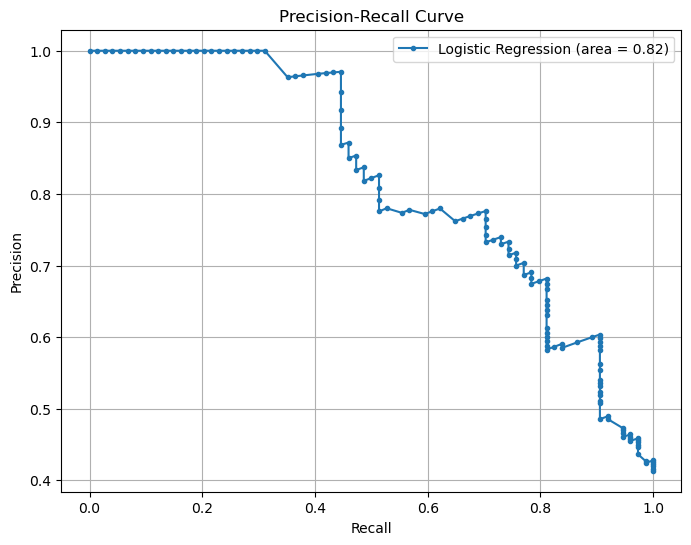

In [25]:
from sklearn.metrics import precision_recall_curve, auc

# Obtener las probabilidades de predicción del modelo
y_scores = model.predict_proba(X_test)[:, 1]

# Calcular precisiones, recalls y umbrales
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Calcular el área bajo la curva
area = auc(recalls, precisions)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label=f'Logistic Regression (area = {area:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
